In [77]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [78]:
import numpy as np
import pandas as pd

In [79]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [80]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [81]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [82]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [83]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [84]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [85]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [86]:
# Grabs the last date entry in the data table  
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

# Get the last 12 months of data by subtracting the last date and # of days in a year
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

('2017-08-23',)
2016-08-23


In [94]:
# Perform a query to retrieve the data and precipitation data
year_rain = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <="2017-08-23").all()

precip_df = pd.DataFrame(year_rain) 
precip_df.head()
precip_df.set_index(precip_df['date'], inplace=True)
precip_df.head()

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-24,2016-08-24,0.08
2016-08-25,2016-08-25,0.08
2016-08-26,2016-08-26,0.00
2016-08-27,2016-08-27,0.00


<IPython.core.display.Javascript object>


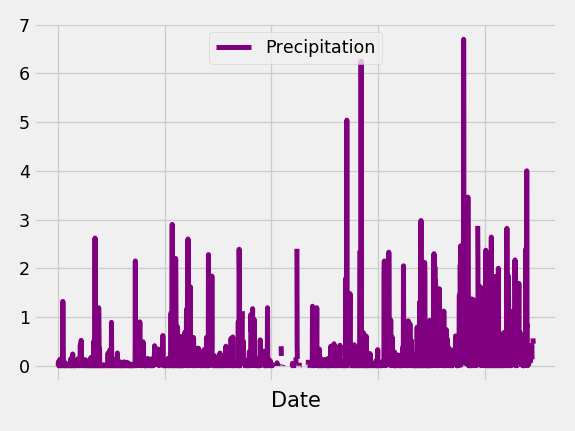

In [95]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot('date', 'prcp', color='purple')
plt.xlabel("Date")
plt.legend(["Precipitation"], loc=9, ncol=7)
plt.xticks(rotation=45) # Rotate x ticks for dates
plt.tight_layout()
plt.show()

In [96]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


STATIONS ANALYSIS BELOW

In [89]:
# How many stations are available in this dataset?
# Grab from the stations table.
station_avails = session.query(Station.station).count()
print("There are {} stations in this dataset.".format(station_avails))

There are 9 stations in this dataset.


In [97]:
# What are the most active stations?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
most_active = active_stations[0][0]    
print("The most active station was",most_active,"with",active_stations[0][1],"weather observations.")
print()
print("List of Stations in descending order with their number of observations: \n")
for station, count in active_stations:
    print("Station",station,"with",count, "weather observations.")

The most active station was USC00519281 with 2772 weather observations.

List of Stations in descending order with their number of observations: 

Station USC00519281 with 2772 weather observations.
Station USC00519397 with 2724 weather observations.
Station USC00513117 with 2709 weather observations.
Station USC00519523 with 2669 weather observations.
Station USC00516128 with 2612 weather observations.
Station USC00514830 with 2202 weather observations.
Station USC00511918 with 1979 weather observations.
Station USC00517948 with 1372 weather observations.
Station USC00518838 with 511 weather observations.


In [98]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
temp = session.query(func.avg(Measurement.tobs).label('avg_temp'), func.min(Measurement.tobs).label('min_temp'),
                func.max(Measurement.tobs).label('max_temp')).filter(Measurement.station == station)
temp_nums = {}
temp_nums['data'] = []

for row in temp:
    temp_nums['data'].append(
    {"Avg Temp": row.avg_temp,
    "Min Temp": row.min_temp,
    "Max Temp": row.max_temp})

temp_nums['data']

[{'Avg Temp': 72.72407045009784, 'Min Temp': 58.0, 'Max Temp': 83.0}]

In [99]:
year_2017 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-23').all()
year_2017 = pd.DataFrame(last_year)
year_2017.tail()

,date,tobs
2218,2017-08-19,71.0
2219,2017-08-20,78.0
2220,2017-08-21,76.0
2221,2017-08-22,76.0
2222,2017-08-23,76.0


<IPython.core.display.Javascript object>


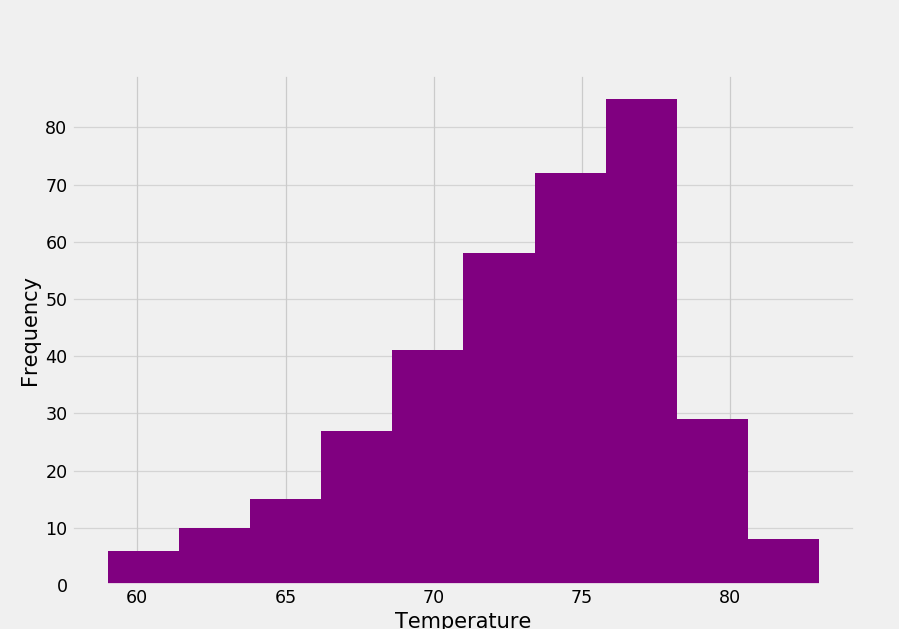

In [100]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observ = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281', Measurement.date > '2016-08-23').all()
observe_df = pd.DataFrame(observ)
observe_df.head()
#-------------------------------------------------------------------
plt.figure(figsize=(10,7))
plt.hist(temp_obsv_df['tobs'], color='purple')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()